In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualisation de données

L'analyse de données s'appuie souvent sur l'étude graphique des données. En fonction de la nature des données caractérisant les individus, à savoir qualitatives ou quantitatives, du nombre de variables décrivant les individus, nous en déduisons les graphiques associés.
Pour rappel :

* graphiques univariés pour une seule variable

  * variable qualitative : diagrammes de fréquence et diagrammes circulaires

  * variable quantitative : histogramme, box-plots, barrres de moyennes

* graphiques croisés pour plusieurs variables

  * entre deux variables quantitatives : nuage de points

  * entre une variable qualitative et une variable quantitative : histogrammes, box-plots

Référence : https://mpra.ub.uni-muenchen.de/76653/1/MPRA_paper_76653.pdf


In [1]:
# Chargement des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt

## Chargement des données

In [8]:
# création de la matrice de données
df = pd.read_csv("/content/drive/MyDrive/MT15-local/TP1/data/WineDataSet.csv")
df = df.rename(columns=({
    'Column1':'Class',
    'Column2':'Alcohol',
    'Column3':'Malic_Acid',
    'Column4':'Ash',
    'Column5':'Ash_Alcalinity',
    'Column6':'Magnesium',
    'Column7':'Total_Phenols',
    'Column8':'Flavanoids',
    'Column9':'Nonflavanoid_Phenols',
    'Column10':'Proanthocyanins',
    'Column11':'Colour_Intensity',
    'Column12':'Hue',
    'Column13':'OD280/OD315_of_diluted_wines',
    'Column14':'Proline'
}))
df.head()

,Class,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Colour_Intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Graphiques simples

Quelques [graphiques de base](http://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) utiles pour une exploration sommaire des données :

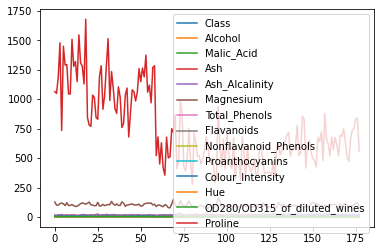

In [9]:
df.plot()

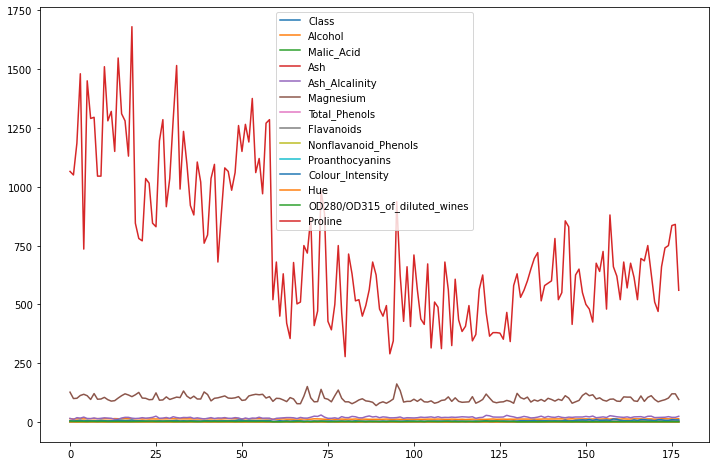

In [10]:
# le même graphique en plus grand
df.plot(figsize=(12, 8))

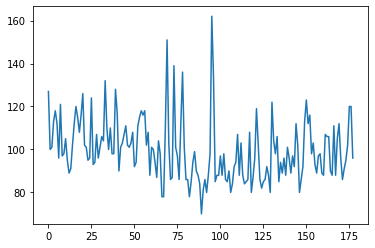

In [11]:
# Graphique sur une seule colonne (variable)
df.Magnesium.plot()
# ou encore df["Magnesium"].plot()

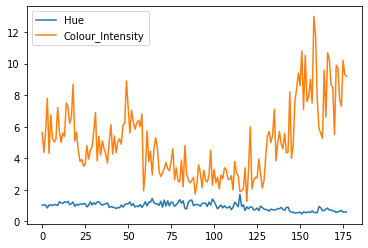

In [12]:
# Graphique sur plusieurs colonnnes
df[['Hue', 'Colour_Intensity']].plot()

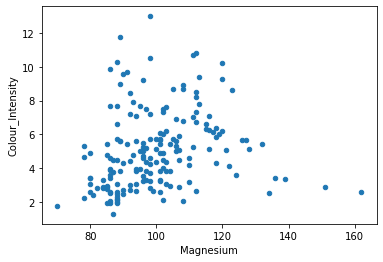

In [13]:
# Une variable en fonction d'une autre 
df.plot.scatter(x="Magnesium", y="Colour_Intensity")

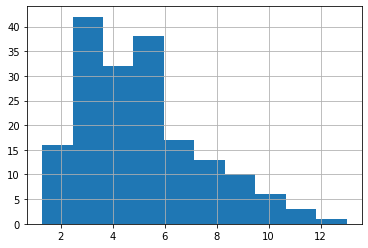

In [14]:
# Histogramme (distribution des valeurs) d'une colonne
df.Colour_Intensity.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a22a63a10>,
      dtype=object)

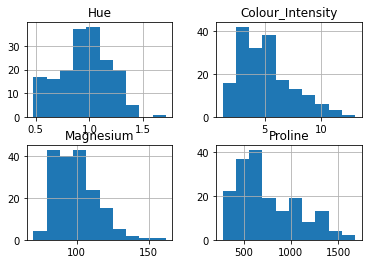

In [ ]:
# Histogramme (distribution des valeurs) sur plusieurs colonnes
df[['Hue', 'Colour_Intensity', 'Magnesium', 'Proline']].hist()

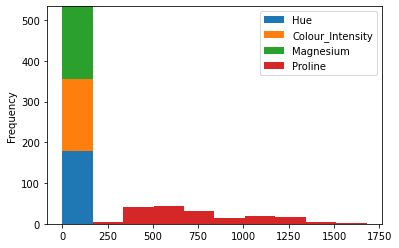

In [18]:
# Les histogrammes précédents sur le même graphique :
df[['Hue', 'Colour_Intensity', 'Magnesium', 'Proline']].plot.hist(stacked=True)

In [21]:
# Calcul de variables centrées-réduites
df['Hue2'] = (df.Hue-df.Hue.mean())/df.Hue.std()
df['Colour_Intensity2'] = (df.Colour_Intensity-df.Colour_Intensity.mean())/df.Colour_Intensity.std()
df['Magnesium2'] = (df.Magnesium-df.Magnesium.mean())/df.Magnesium.std()
df['Proline2'] = (df.Proline-df.Proline.mean())/df.Proline.std()
df[['Hue2', 'Colour_Intensity2', 'Magnesium2', 'Proline2']].head()

,Hue2,Colour_Intensity2,Magnesium2,Proline2
0,0.361158,0.251009,1.908522,1.010159
1,0.404908,-0.292496,0.018094,0.962526
2,0.317409,0.268263,0.088110,1.391224
3,-0.426341,1.182732,0.928300,2.328007
4,0.361158,-0.318377,1.278379,-0.037767


In [20]:
# Vérification
print("La moyenne est de: ", df['Proline2'].mean())
print("L'écart type est de: ", df['Proline2'].std())

La moyenne est de:  -1.3409997207551048e-16
L'écart type est de:  1.0000000000000007


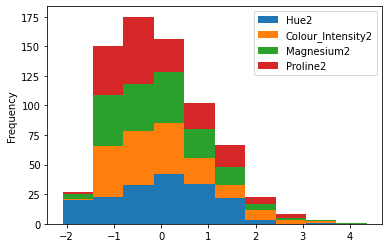

In [ ]:
# Les histogrammes précédents sur le même graphique
df[['Hue2', 'Colour_Intensity2', 'Magnesium2', 'Proline2']].plot.hist(stacked=True)

### Barres verticales

On souhaite faire le graphique en barres verticales des moyennes sur 3 mesures (avec les écarts types)

In [22]:
# Création de la valeur moyenne pour les 3 mesures
valeurs_moyennes = [df.Alcohol.mean(), df.Magnesium.mean(), df.Colour_Intensity.mean()]
valeurs_moyennes

[13.000617977528083, 99.74157303370787, 5.058089882022473]

In [23]:
# Calcul des écarts type
ecarts_types = [df.Alcohol.values.std(), df.Magnesium.values.std(), df.Colour_Intensity.values.std()]
ecarts_types

[0.8095429145285168, 14.242307673359806, 2.3117646609525573]

In [24]:
# on prend 1.96 ecart-type (interval de confiance à 95%)
ecarts_types_norm = [1.96*ec for ec in ecarts_types]
ecarts_types_norm

[1.586704112475893, 27.91492303978522, 4.531058735467012]

In [25]:
# Création des labels
bar_labels = ['Alcohol', 'Magnesium', 'Colour_Intensity']

<BarContainer object of 3 artists>

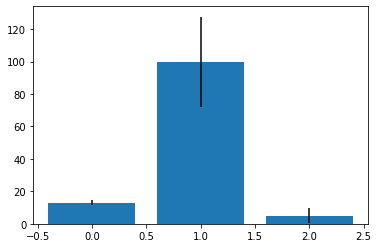

In [26]:
# Récupération de l'objet figure et de l'objet axis
fig, ax = plt.subplots()
# Création des valeurs de l'axe des abscisses
x_position = list(range(len(bar_labels)))
#ou bien directement x_position =list(range(3))
# Création du graphique
plt.bar(x_position, valeurs_moyennes, yerr = ecarts_types_norm)

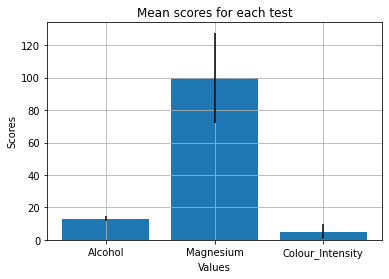

In [ ]:
# On refait le graphiques précédant avec une meilleure mise en forme

# Récupération de l'objet figure et de l'objet axis
fig, ax = plt.subplots()
# Création des valeurs de l'axe des abscisses
x_position = list(range(len(bar_labels)))
# Création du graphique
plt.bar(x_position, valeurs_moyennes, yerr = ecarts_types_norm)



# ajouter des grilles
plt.grid()
# Nommer les axes
plt.ylabel("Scores")
plt.xlabel("Values")
# Labéliser chaque barre
plt.xticks(x_position, bar_labels)
# Nommer le graphique
plt.title("Mean scores for each test")
# Affichage
plt.show()

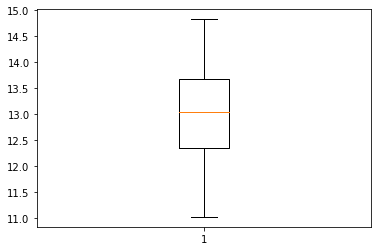

In [ ]:
# Diagramme en boite
plt.boxplot(df.Alcohol.values)
plt.show()

In [27]:
# On norme les données pour pouvoir comparer leurs répartitions
data_norm = [(df.Alcohol.values-valeurs_moyennes[0])/ecarts_types[0],(df.Magnesium.values-valeurs_moyennes[1])/ecarts_types[1],(df.Colour_Intensity.values-valeurs_moyennes[2])/ecarts_types[2]]

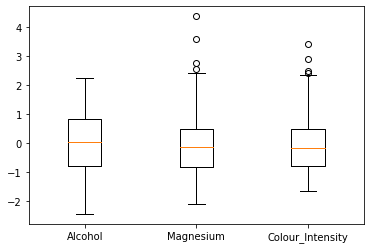

In [28]:
# Diagramme en boite groupés avec les données normalisées
plt.boxplot(data_norm)
# Labélisation 
x_position = [1,2,3]
plt.xticks(x_position, bar_labels)
# Affichage
plt.show()

## Définition et paramètrage de graphiques en plusieurs cadrans

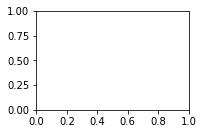

In [29]:
plt.subplot(221)

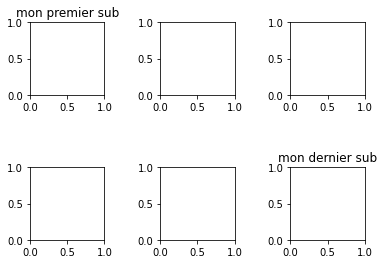

In [30]:
fig = plt.figure()
# 6 sous-graphiques : 2*3
fig.add_subplot(231)
plt.title('mon premier sub')
fig.add_subplot(232)
fig.add_subplot(233)
fig.add_subplot(234)
fig.add_subplot(235)
fig.add_subplot(236)
plt.title('mon dernier sub')
# Réglage des espaces horizontaux et verticaux entre les sous-graphiques
plt.subplots_adjust(hspace=1, wspace=0.75)
plt.show()


In [31]:
# Nous souhaitons récupérer les 5 premiers individus avec les variables Magnesium, Alcohol et Colour_Intensity
data5=df.loc[0:4,["Magnesium","Alcohol","Colour_Intensity"]]
data5

,Magnesium,Alcohol,Colour_Intensity
0,127,14.23,5.64
1,100,13.20,4.38
2,101,13.16,5.68
3,113,14.37,7.80
4,118,13.24,4.32


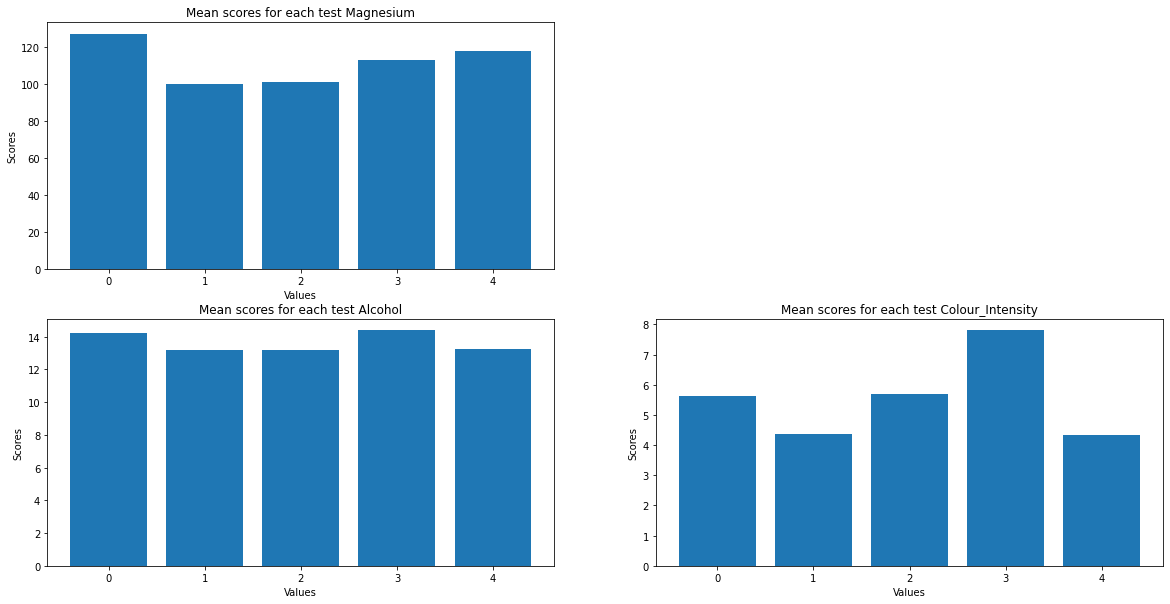

In [ ]:
# Récupération de l'objet figure et de l'objet axis
fig = plt.figure('mon_graphique',figsize=(20,10))

# Création du cadran Magnésium
ax = fig.add_subplot(221)
# Création des valeurs de l'axe des abscisses
x_position = list(range(5))
# Création du graphique, sur la deuxième variable
plt.bar(x_position, data5.Magnesium, label = "Magnesium")
# Nommer les axes
ax.set_ylabel("Scores")
ax.set_xlabel("Values")
# Nommer le graphique
ax.set_title('Mean scores for each test Magnesium')


# Création du cadran Alcohol
ax = fig.add_subplot(223)
x_position = list(range(5))
plt.bar(x_position, data5.Alcohol, label = "Alcohol")
ax.set_ylabel("Scores")
ax.set_xlabel("Values")
ax.set_title('Mean scores for each test Alcohol')


# Création du cadran Colour Intensity
ax = fig.add_subplot(224)
x_position = list(range(5))
plt.bar(x_position, data5.Colour_Intensity, label = "Colour_Intensity")
ax.set_ylabel("Scores")
ax.set_xlabel("Values")
ax.set_title('Mean scores for each test Colour_Intensity')

plt.show()
